## Analyzing COVID 19 Data
## By Mohammed Alenazy
This project aims to analyze COVID 19 Cases and answer some key questions using the data. The focus will be on 4 main variables which are:Confirmed cases, Deaths, Recovered cases, and the Country/Region.

## Data Gathering
The first step in the project is to gather the data and explore it, the data was provided by Kaggle. The data can be found using the link [Here](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv), Last Updatd on 06/01/2020

In [285]:
import pandas as pd
import matplotlib.pyplot as plt

In [286]:
df = pd.read_csv("covid_19_data.csv")

In [287]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,33211.000000,33211.000000,33211.000000,33211.000000
mean,16606.000000,6776.182861,438.226762,2300.870374
std,9587.334232,25703.665536,2350.699558,14011.004761
min,1.000000,0.000000,0.000000,0.000000
25%,8303.500000,26.000000,0.000000,0.000000
50%,16606.000000,316.000000,4.000000,15.000000
75%,24908.500000,2077.000000,56.000000,325.000000
max,33211.000000,405843.000000,39045.000000,458231.000000


In [288]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [289]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     16128
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33211 entries, 0 to 33210
Data columns (total 8 columns):
SNo                33211 non-null int64
ObservationDate    33211 non-null object
Province/State     17083 non-null object
Country/Region     33211 non-null object
Last Update        33211 non-null object
Confirmed          33211 non-null float64
Deaths             33211 non-null float64
Recovered          33211 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.0+ MB


In [291]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Data Wranggling
After exploring the data we need to clean it and prepare it for the analysis.

In [292]:
df=df.drop(columns=['Province/State'])

In [293]:
df.head()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


>Due to the high volume of missing data in the column Province/State, we decided to remove it and focus on Country/Region

In [294]:
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

In [295]:
df['Last Update']= pd.to_datetime(df['Last Update'])

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33211 entries, 0 to 33210
Data columns (total 7 columns):
SNo                33211 non-null int64
ObservationDate    33211 non-null datetime64[ns]
Country/Region     33211 non-null object
Last Update        33211 non-null datetime64[ns]
Confirmed          33211 non-null float64
Deaths             33211 non-null float64
Recovered          33211 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 1.8+ MB


In [297]:
df['Country/Region'].loc[df['Country/Region'] == "Mainland China"] = "China"

C:\Users\mmale\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [298]:
df['Country/Region'].loc[df['Country/Region'] == "Hong Kong"] = "China"

>We compined the records of Mainland China and Hong kong into one record called China. The reason behind the change is that even though they are considered two different countries it was easy to travel between the two countries, which was one of the big factors in the virus's spreading.

## Data Analysis
After cleaning the data, we will analyze it to answer 3 questions, these questions are:

1- Which are the top countries in terms of confirmed, deaths, and recovered Covid-19 cases.

2- How much is the spread of the virus as time pass by.

3- Which are the top countries with the highest death rate from Covid-19.

>Which are the top countries in terms of confirmed, deaths, and recovered Covid-19 cases.

In [299]:
Confirm=df.groupby(["ObservationDate","Country/Region"])[["Confirmed"]].sum().reset_index()

In [300]:
Confirm.head()

,ObservationDate,Country/Region,Confirmed
0,2020-01-22,China,547.0
1,2020-01-22,Japan,2.0
2,2020-01-22,Macau,1.0
3,2020-01-22,South Korea,1.0
4,2020-01-22,Taiwan,1.0


In [301]:
Confirm_Country = Confirm.loc[Confirm['ObservationDate'] == "2020-06-01"]

In [302]:
Confirm_Country=Confirm_Country.sort_values(by='Confirmed', ascending=False).head(10)

In [303]:
def Plot(dataframe,x_axis,y_axis,Kinds,y_label,title,colors):
    dataframe.plot(x =x_axis, y=y_axis, kind = Kinds,color=colors, figsize=(12,10))
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

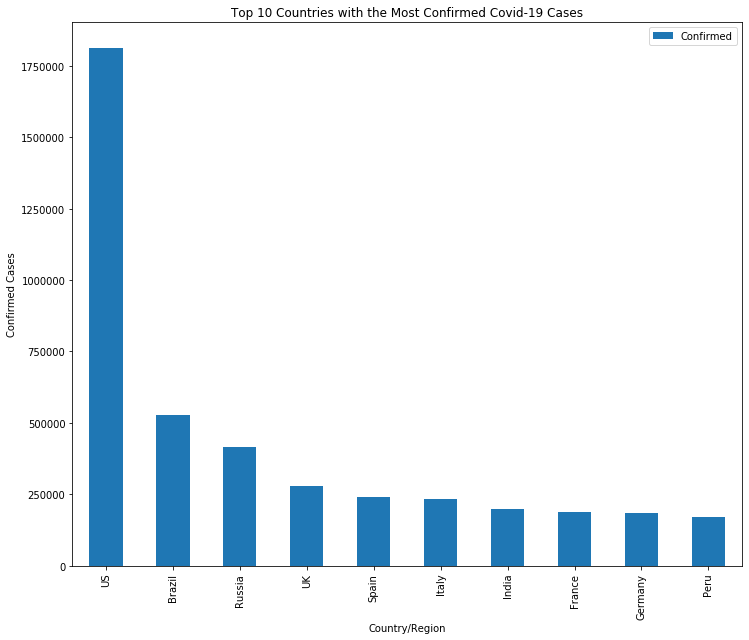

In [304]:
Plot(Confirm_Country,'Country/Region','Confirmed','bar',"Confirmed Cases","Top 10 Countries with the Most Confirmed Covid-19 Cases","C0")

In [305]:
def Group_by(Dataframe,Column):
    Temp = Dataframe.groupby(["ObservationDate","Country/Region"])[[Column]].sum().reset_index()
    Temp2 = Temp.loc[Temp["ObservationDate"] == "2020-06-01"]
    Temp2=Temp2.sort_values(by=Column, ascending=False).head(10)
    return Temp2

In [306]:
Death_Country = Group_by(df,"Deaths")

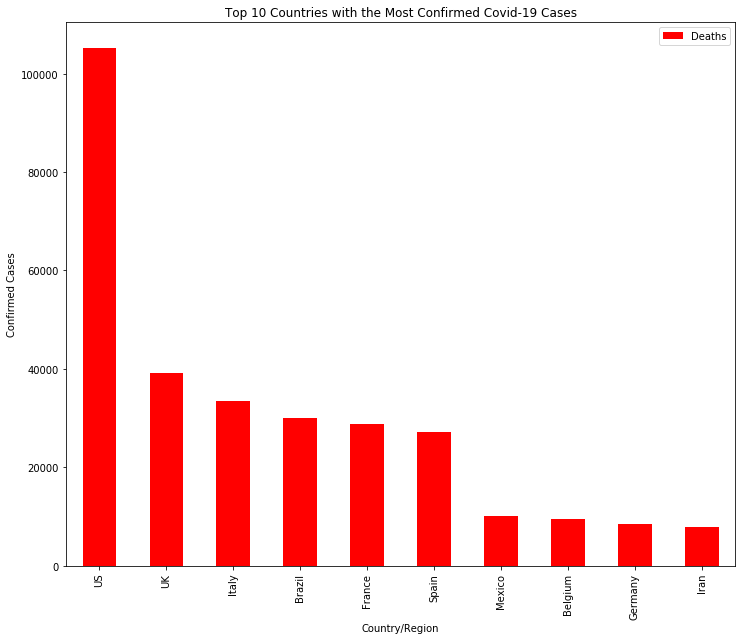

In [307]:
Plot(Death_Country,'Country/Region','Deaths','bar',"Confirmed Cases","Top 10 Countries with the Most Confirmed Covid-19 Cases","red")

In [308]:
Recovered_Country= Group_by(df,"Recovered")

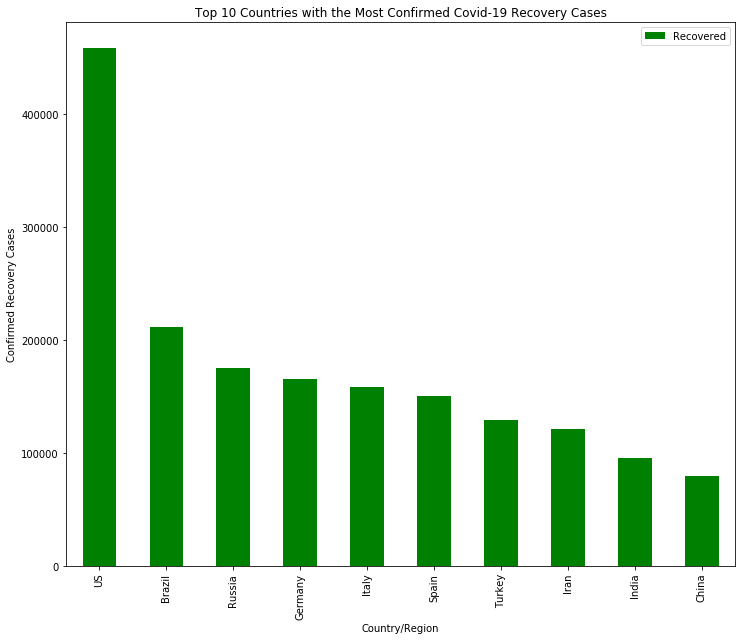

In [309]:
Plot(Recovered_Country,'Country/Region','Recovered','bar',"Confirmed Recovery Cases","Top 10 Countries with the Most Confirmed Covid-19 Recovery Cases","green")

> How much is the spread of the virus as time pass by. 

In [310]:
Confirm_Time = df["Confirmed"].groupby(df["ObservationDate"]).sum().reset_index()

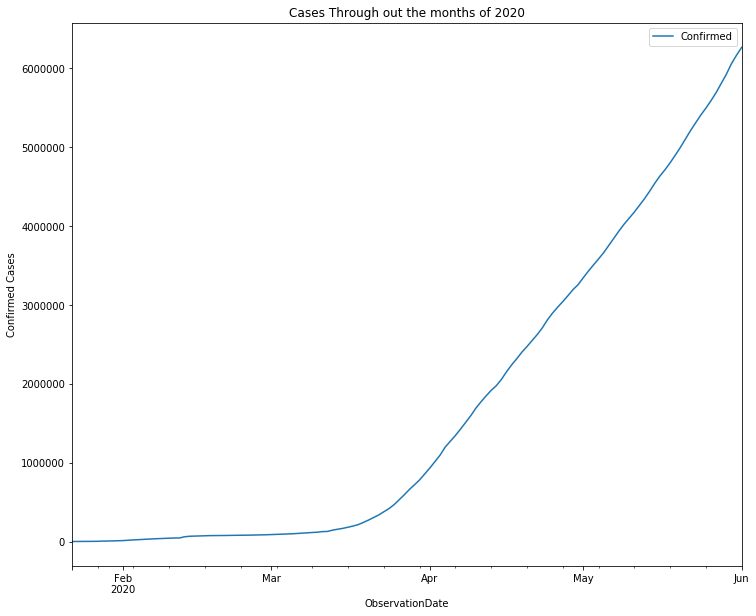

In [311]:
Plot(Confirm_Time,'ObservationDate','Confirmed','line',"Confirmed Cases","Cases Through out the months of 2020","C0")

In [312]:
Confirm_Time["month"]=pd.DatetimeIndex(Confirm_Time['ObservationDate']).month

In [313]:
Time=Confirm_Time.loc[(Confirm_Time['month'] >= 3) & (Confirm_Time['month'] <= 4)]

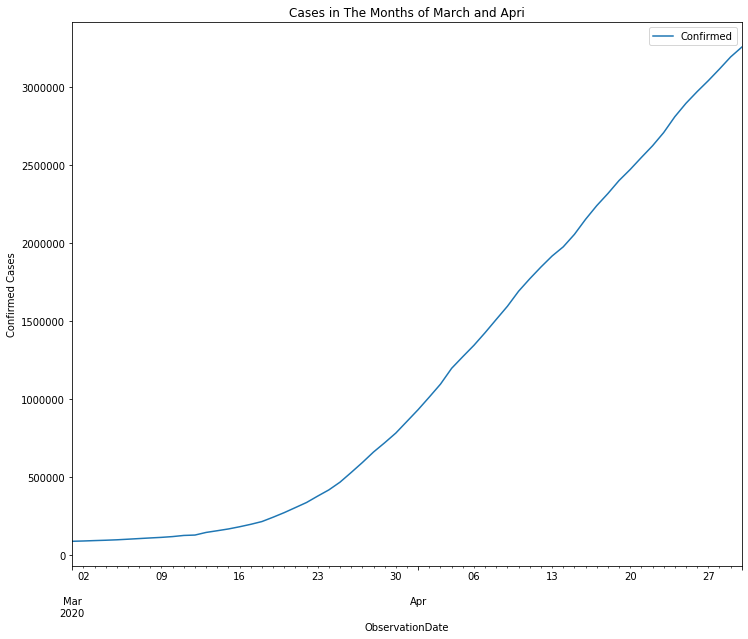

In [314]:
Plot(Time,'ObservationDate','Confirmed','line',"Confirmed Cases","Cases in The Months of March and Apri","C0")

>Which are the top countries with the highest death rate from Covid-19.

In [315]:
Confirm["Death_Percent"]=Death["Deaths"]/Confirm["Confirmed"]*100

In [316]:
Death_per=Confirm.loc[Confirm['ObservationDate'] == "2020-06-01"]

In [317]:
Death_per=Death_per.sort_values(by='Death_Percent', ascending=False).head(10)

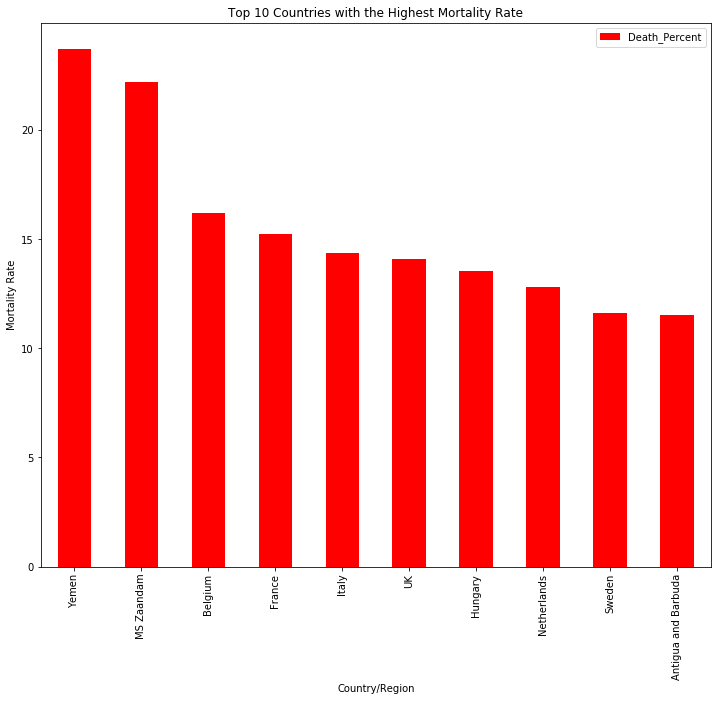

In [318]:
Plot(Death_per,'Country/Region','Death_Percent','bar',"Mortality Rate","Top 10 Countries with the Highest Mortality Rate","red")